# Model Creation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df_filtered = pd.read_csv('data\\df_filtered.csv')

df_filtered.head()

df_filtered.dtypes

City                 object
FuelType             object
BodyType             object
KmsDriven           float64
TransmissionType     object
NumberOwner           int64
Insurance            object
Manufacturer         object
CarModel             object
ModelYear             int64
VariantName          object
Mileage             float64
Engine                int64
Price               float64
No of Cylinder        int64
Seats                 int64
AgeOfCar            float64
dtype: object

## Removing unnecessary features

**Dropping `CarModel` ,`VariantName	` ,`Manufacturer` and `Mileage_log`**

These features  are not directly correlated with the price of car and they can actually introduce noise into the model. For example, two cars with the same features but different brands may have different prices. This is because brand reputation and perceived quality can play a role in determining the price of a car. By dropping the `CarModel` , `VariantName` ,`Manufacturer` and `Mileage_log`, we can create a model that is more accurate and reliable.

In [3]:
df_model = df_filtered.copy()

df_model.drop(labels=['FuelType', 'City', 'CarModel', 'VariantName', 'BodyType', 'ModelYear',
                      'Insurance', 'Manufacturer', 'NumberOwner', 'Seats', 'No of Cylinder', 'KmsDriven'
                      ], axis=1, inplace=True)

df_model

,TransmissionType,Mileage,Engine,Price,AgeOfCar
0,Manual,23.0,998,400000.0,9.0
1,Manual,17.0,1497,811000.0,6.0
2,Manual,23.0,1199,585000.0,6.0
3,Manual,19.0,1197,462000.0,10.0
4,Manual,23.0,1248,790000.0,9.0
...,...,...,...,...,...
7961,Automatic,22.0,1197,620000.0,6.0
7962,Manual,19.0,1461,890000.0,6.0
7963,Automatic,17.0,1198,801000.0,6.0
7964,Automatic,16.0,1968,1657500.0,7.0


In [4]:
df_model=pd.get_dummies(df_model,dtype=float)
df_model

,Mileage,Engine,Price,AgeOfCar,TransmissionType_Automatic,TransmissionType_Manual
0,23.0,998,400000.0,9.0,0.0,1.0
1,17.0,1497,811000.0,6.0,0.0,1.0
2,23.0,1199,585000.0,6.0,0.0,1.0
3,19.0,1197,462000.0,10.0,0.0,1.0
4,23.0,1248,790000.0,9.0,0.0,1.0
...,...,...,...,...,...,...
7961,22.0,1197,620000.0,6.0,1.0,0.0
7962,19.0,1461,890000.0,6.0,0.0,1.0
7963,17.0,1198,801000.0,6.0,1.0,0.0
7964,16.0,1968,1657500.0,7.0,1.0,0.0


In [5]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mileage                     7966 non-null   float64
 1   Engine                      7966 non-null   int64  
 2   Price                       7966 non-null   float64
 3   AgeOfCar                    7966 non-null   float64
 4   TransmissionType_Automatic  7966 non-null   float64
 5   TransmissionType_Manual     7966 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 373.5 KB


## Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)

In [6]:
X = df_model.drop('Price',axis=1)      # Feature Matrix
y = df_model['Price']    # Target Variable

## Checking for important features

In [7]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

print(model.fit(X,y))

ExtraTreesRegressor()


In [8]:
print('-'*50)
print('Checking for feature importance')
print('-'*50)

print(model.feature_importances_)

--------------------------------------------------
Checking for feature importance
--------------------------------------------------
[0.10988523 0.34757239 0.26157517 0.12103701 0.1599302 ]


### Visulization for feature importance

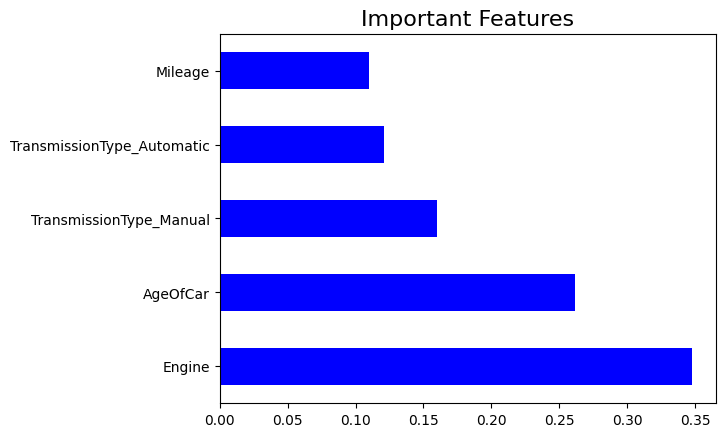

In [9]:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(10).plot(kind = 'barh', color='blue')
plt.title('Important Features', fontsize=16)
plt.show()

# Model Building & Evaluation

#### Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Importing important libraries for Model Building

In [11]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [12]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

## Creating DataFrame for Model Comparison

In [13]:
ML_model_df=pd.DataFrame({"Model":[ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', \
                                   'Random Forest Regressor', 'Ridge', 'Lasso'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

,Mean Squarred Error,Root Mean Squarred Error,Explained Variance Score,R-Sqaure Score(Accuracy)
Model,,,,
Linear Regression,4.702908e+10,216861.888276,0.764250,0.764245
Support Vector Rregression,2.119578e+11,460388.724846,0.000962,-0.062537
Decision Tree Regressor,2.213506e+10,148778.567851,0.889046,0.889038
Random Forest Regressor,1.842732e+10,135747.247177,0.907644,0.907625
Ridge,4.702846e+10,216860.460520,0.764253,0.764248
Lasso,4.702905e+10,216861.814694,0.764250,0.764245


In [14]:
# **Hyperparameter Tuning for RandomForestRegressor**
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200],  # Reduce the range
    'max_depth': [10, 20],  # Reduce the range
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2']
}

# Initialize RandomForest model
rf = RandomForestRegressor()

# Initialize RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=20, cv=2, verbose=2, n_jobs=-1, random_state=42)

# Hyper_model= RandomForestRegressor(max_depth = 20 ,max_features='log2' ,min_samples_leaf=1, min_samples_split=2,n_estimators =50)

# Fit the model with best parameters
random_search.fit(X_train, y_train)

# Get the best model
best_rf = random_search.best_estimator_

# Evaluate the tuned RandomForest model
rf_pred = best_rf.predict(X_test)

# Calculate metrics for the tuned model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_evs = explained_variance_score(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Append RandomForest performance to the DataFrame
ML_model_df.loc['Random Forest Regressor'] = [rf_mse, rf_rmse, rf_evs, rf_r2]
ML_model_df


Fitting 2 folds for each of 16 candidates, totalling 32 fits


,Mean Squarred Error,Root Mean Squarred Error,Explained Variance Score,R-Sqaure Score(Accuracy)
Model,,,,
Linear Regression,4.702908e+10,216861.888276,0.764250,0.764245
Support Vector Rregression,2.119578e+11,460388.724846,0.000962,-0.062537
Decision Tree Regressor,2.213506e+10,148778.567851,0.889046,0.889038
Random Forest Regressor,1.778563e+10,133362.772997,0.910842,0.910841
Ridge,4.702846e+10,216860.460520,0.764253,0.764248
Lasso,4.702905e+10,216861.814694,0.764250,0.764245


# Selection of Best Model & Hyperparameter Tuning

Random Forest Regressor > Decision Tree Regressor >Linear Regression - Ridge - Lasso

In summary, the Random Forest Regressor performs best in predicting used car prices based on accuracy scores. However, model selection should consider interpretability, computational complexity and business requirements. Decision Tree Regressor is a strong alternative offering good accuracy and interpretability. Support Vector Regression may capture complex relationships but has lower accuracy. Ridge and Lasso provide simpler linear models.

# Generating Pickle File- Saving Trained Model

In [15]:
import pickle

# Save the model using pickle
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_rf, file)

In [16]:
# Assume you've already loaded the model
with open(model_filename, 'rb') as file:
    loaded_rf_model = pickle.load(file)

# Example: Create a new data point for prediction
# Replace the values below with the actual features for which you want to predict the price
new_data = {
    'Mileage' : 20, 
    'Engine' : 998, 
    'AgeOfCar' : 25,
    'TransmissionType_Automatic' : 0, 
    'TransmissionType_Manual' : 1
}

# Convert the new data point into a DataFrame (like how X_train was structured)
new_data_df = pd.DataFrame([new_data])

# Use the loaded model to predict the price
predicted_price = loaded_rf_model.predict(new_data_df)

print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: 127226.94393310935
